In [1]:
import cv2
import cv
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
from sklearn.cluster import k_means
from sklearn.decomposition import PCA
from scipy.fftpack import dct
from sklearn import preprocessing
from sklearn.svm import SVC
from featurizer import Featurizer,convert_lab
from colorizer import Colorizer

In [3]:
test_image = skio.imread("images/jolie_port.jpg")
training_images = ["images/.jpg"]

In [4]:
def get_grayscale(image):
    gray = cv2.cvtColor(image, cv.CV_RGB2GRAY)
    return cv2.merge((gray,gray,gray))

def select_hyperparams(k,pc,actual_image):
    #getting the right featurizer
    f = Featurizer(training_images,k=k,pca_size=pc,num_samples=20000)
    f.compute_k_means()
    print "Getting features..."
    f.compute_features()
    #getting the right colorizer
    colorizer = Colorizer(f)
    print "Starting Training of SVMs..."
    colorizer.train()
    #running the experiment
    print "Colorizing Image..."
    gray_test = get_grayscale(actual_image)
    colored_image = colorizer.color_image(gray_test)
    print "K: " + str(k)
    print "PCA Size: " + str(pc)    
    print "********************************"
    skio.imshow(colored_image)
    skio.show()

In [5]:
windowSizes = [5,10,20]
gamma = [1.0/32,1.0/64,1.0/16]
c = [.5,1.5]
#k= [10,15,25]
k = [16,64]
pc = [16,64,128]

Cluster Centers...
[[ 133.99970944  138.10309701]
 [ 125.05522106  126.74227525]
 [ 151.74110161  138.47762975]
 [ 136.16430978  138.60335738]
 [ 121.47100441  125.91299126]
 [ 131.96815568  130.53984962]
 [ 136.40373274  142.26510789]
 [ 130.52907986  126.66478588]
 [ 117.78420971  125.79513185]
 [ 138.35507885  139.24068364]
 [ 140.83451747  142.92569568]
 [ 135.83399025  136.59165609]
 [ 125.40462963  118.84444444]
 [ 133.76301091  140.41582711]
 [ 133.85602402  134.7607362 ]
 [ 123.97481489  127.21764637]]
Getting features...
SURF Features...
DFT Features...
Meanvar Features...
Starting Training of SVMs...
Feature Shape...(20000, 16)
Label Shape...(20000,)
Colorizing Image...
Done Computing Margins...
Done Getting Graph Cut
K: 16
PCA Size: 16
********************************


/home/vashishtm/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:775: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


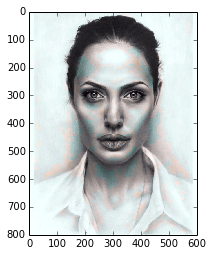

Cluster Centers...
[[ 125.05580826  126.74864813]
 [ 133.83539428  139.69639841]
 [ 136.26793735  138.20996796]
 [ 145.89791517  144.51761323]
 [ 119.09432398  125.86594388]
 [ 136.06955824  142.10606325]
 [ 134.46594403  133.95587331]
 [ 130.58834456  126.4906741 ]
 [ 138.42322184  138.87486626]
 [ 139.05228699  142.36982813]
 [ 151.91351466  138.0599235 ]
 [ 121.34072052  125.88997205]
 [ 134.19963149  137.51653892]
 [ 123.83318179  127.03354328]
 [ 125.35459662  118.80487805]
 [ 131.44577459  130.3634832 ]]
Getting features...
SURF Features...
DFT Features...
Meanvar Features...
Starting Training of SVMs...
Feature Shape...(20000, 64)
Label Shape...(20000,)
Colorizing Image...

In [ ]:
%matplotlib inline  
for k_i in k:
    for p_i in pc:
        select_hyperparams(k_i,p_i,test_image)